In [493]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys

In [494]:
# #Generating sin(2TIx) values, x E [0 1]
%matplotlib inline
pi = math.pi
# x= np.linspace(0,1,20)
# y = np.sin(2*pi*x)
# plt.plot(x, y)
# #[<matplotlib.lines.Line2D object at 0x25d1ed0>]
# plt.show()

In [495]:
def normal_fn(mu,sigma):        
    #randvalues = [random.randrange(0,100000,3000)/100000 for _ in range (3000)]
    xvalues = np.linspace(0, 1, 800)
    c1 = 1/(math.sqrt(2*pi)*sigma)
    c2 = [math.pow(math.e,-1*math.pow(0.707*(val - mu)/sigma, 2)) for val in xvalues]
    c3 = [val2*c1 for val2 in c2]
#     plt.plot(xvalues, c3, '.')
#     plt.show()
    return (xvalues, c3)
    
(normalx, normalvalues) = normal_fn(0, math.sqrt(0.1))
print (normalx[0], normalvalues[0])

0.0 1.2615662610100802


In [496]:
def gen_rand(k, D):
    templist = [random.randrange(0,1000, 1)/1000 for _ in range(k)]
    finalarray = np.zeros((20, D)) 
    for ind, temp in enumerate(templist):
        for j in range(D):
            finalarray[ind][j] =temp**j 
    return finalarray

x = gen_rand(20,D)   
print(np.shape(x))
print(x[:, 1])

(20, 10)
[0.412 0.82  0.467 0.253 0.937 0.448 0.477 0.108 0.078 0.746 0.271 0.314
 0.173 0.948 0.008 0.906 0.649 0.429 0.514 0.95 ]


In [497]:
def target_gen(L, xlist):
    eps = np.zeros((20, L))
    targetvalues = np.zeros((20, L))

    for idx, eachx in enumerate(xlist):
        randindex = np.random.randint(0, len(normalvalues))
        eps[idx] = [normalvalues[randindex] for _ in range(L)]
        #targetvalues = eps + f(x)
        targetvalues[idx] = [np.sin(2*pi*eachx)+eps[idx][idx2] for idx2 in range(L)]
    return targetvalues

In [498]:
z = target_gen(5, x[:, 1])

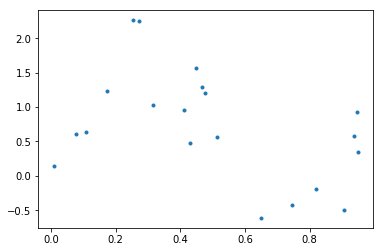

In [499]:
plt.plot(x[:, 1] ,z[:,2],'.')

In [500]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
   # x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 1000
alpha = 1
theta = np.ones(n)
theta = gradientDescent(x, z[:, 2], theta, alpha, 20, numIterations)
print(theta)

Iteration 0 | Cost: 6.772056
Iteration 1 | Cost: 4.737305
Iteration 2 | Cost: 3.463997
Iteration 3 | Cost: 2.602312
Iteration 4 | Cost: 1.990357
Iteration 5 | Cost: 1.543882
Iteration 6 | Cost: 1.213454
Iteration 7 | Cost: 0.967084
Iteration 8 | Cost: 0.782662
Iteration 9 | Cost: 0.644301
Iteration 10 | Cost: 0.540345
Iteration 11 | Cost: 0.462145
Iteration 12 | Cost: 0.403249
Iteration 13 | Cost: 0.358833
Iteration 14 | Cost: 0.325280
Iteration 15 | Cost: 0.299881
Iteration 16 | Cost: 0.280605
Iteration 17 | Cost: 0.265927
Iteration 18 | Cost: 0.254704
Iteration 19 | Cost: 0.246078
Iteration 20 | Cost: 0.239405
Iteration 21 | Cost: 0.234204
Iteration 22 | Cost: 0.230110
Iteration 23 | Cost: 0.226852
Iteration 24 | Cost: 0.224226
Iteration 25 | Cost: 0.222078
Iteration 26 | Cost: 0.220293
Iteration 27 | Cost: 0.218785
Iteration 28 | Cost: 0.217487
Iteration 29 | Cost: 0.216352
Iteration 30 | Cost: 0.215342
Iteration 31 | Cost: 0.214429
Iteration 32 | Cost: 0.213592
Iteration 33 | Cost:

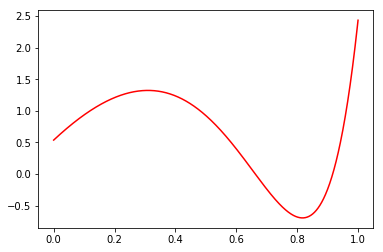

In [501]:
def final_function(test,D):
    output = []
    for x in test:
        #xvector = [1, x, x**2, x**3, x**4, x**5, x**6]
        xvector = []
        for j in range(D):
            xvector.append(x**j)
        output.append(np.dot(xvector, theta))
    #print(len(test))
   # print(len(output))
    plt.plot(test, output,'red')
    plt.show()
final_function(np.linspace(0, 1, 1000),10)


In [502]:
gen_rand(20,8)
final_function(np.linspace(0, 1, 1000),8)

ValueError: shapes (8,) and (10,) not aligned: 8 (dim 0) != 10 (dim 0)